<a href="https://colab.research.google.com/github/DomingosN/Ciencia-da-dados-aplicada-as-Organiza-es-/blob/master/Modelo_Geral_para_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo Geral Classificação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# algoritmos de classificação
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
link ='https://raw.githubusercontent.com/DomingosN/Material_Aprendizado_Maquina_TADS_U-_2020/master/Restaurante_1.csv'
df = pd.read_csv(link, index_col=0, error_bad_lines=False)

In [10]:
df

,PreçoRefeição,TempoEspera,Classe,Classe200
0,105.902369,35.441249,0,0.000000
1,71.296740,23.405187,0,0.000000
2,158.048805,49.275638,1,198.898368
3,76.969847,28.995436,0,0.000000
4,128.767886,43.784905,1,198.898368
...,...,...,...,...
995,92.749865,38.192170,1,198.898368
996,52.583918,21.577793,0,0.000000
997,126.656481,42.211595,1,198.898368
998,174.624536,32.784199,1,198.898368


## Histograma do Tempo de Espera
vamos fazer um histograma do Tempo de Espera

Text(0, 0.5, 'Frequencia')

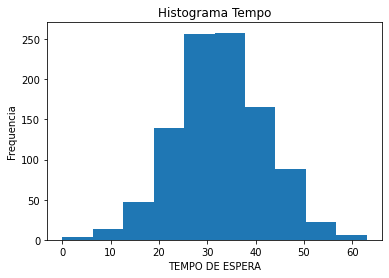

In [11]:
df.TempoEspera.plot.hist()
plt.title('Histograma Tempo')
plt.xlabel('TEMPO DE ESPERA')
plt.ylabel('Frequencia')

## Histograma do Preço da Refeição
vamos fazer um histograma do Tempo de Espera

Text(0, 0.5, 'Frequencia')

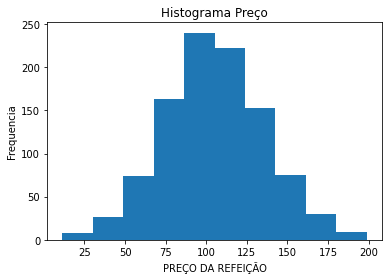

In [12]:
df.PreçoRefeição.plot.hist()
plt.title('Histograma Preço')
plt.xlabel('PREÇO DA REFEIÇÃO')
plt.ylabel('Frequencia')

## Gráfico de Linha do Preçoa da Refeição

Text(0.5, 0, 'Refeições')

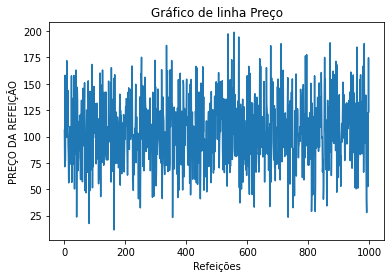

In [13]:
df.PreçoRefeição.plot()
plt.title('Gráfico de linha Preço')
plt.ylabel('PREÇO DA REFEIÇÃO')
plt.xlabel('Refeições')

Este não parece ser um gráfcio muito útil, mas vamos ordenar os valores da refeição no eixo X para ver se ele nos dá uma idéia melhor dos dados

Text(0.5, 0, 'Refeições')

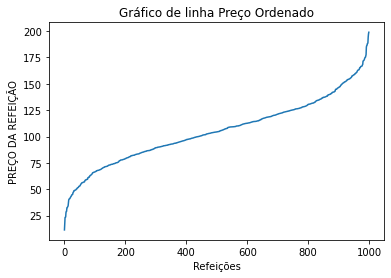

In [14]:
df.PreçoRefeição.sort_values().reset_index(drop=True).plot()
plt.title('Gráfico de linha Preço Ordenado')
plt.ylabel('PREÇO DA REFEIÇÃO')
plt.xlabel('Refeições')

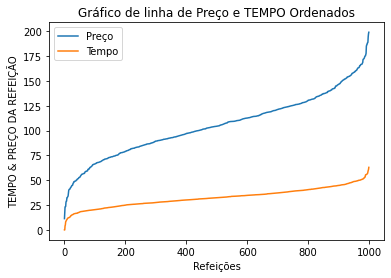

In [15]:
df.PreçoRefeição.sort_values().reset_index(drop=True).plot(label='Preço')
df.TempoEspera.sort_values().reset_index(drop=True).plot(label='Tempo')
plt.title('Gráfico de linha de Preço e TEMPO Ordenados')
plt.ylabel('TEMPO & PREÇO DA REFEIÇÃO')
plt.xlabel('Refeições')
plt.legend()

Apresentar os Gráfico com dados Ordenados pode ser um recurso útil mas o idela seria apresnetar esse recurso ordenando pela classe que é nossa varáivel alvo, deste modo foi criada uma variavel auxiliar que ajuda a organizar como queremos, essa variavel se chama Classe200 é é igaual a varáivel classe mas qunado a Classe é igual a 1 ele vale o valor máximo da refeição e qunapd a classe é 0 ela vale 0.

Text(0.5, 0, 'Refeições')

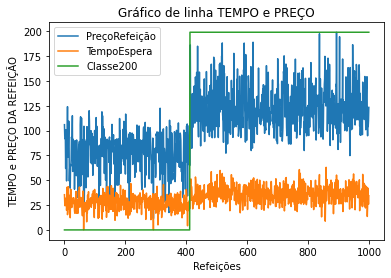

In [16]:
df[['PreçoRefeição','TempoEspera','Classe200']].sort_values(by='Classe200').reset_index().drop(['index'], axis=1).plot()
plt.title('Gráfico de linha TEMPO e PREÇO')
plt.ylabel('TEMPO e PREÇO DA REFEIÇÃO')
plt.xlabel('Refeições')

Essa visualização nos ajuda a entender que existe um ponto onde os clientes passsam de instaisfeitos para satifeitos. mas não é a melhor ferramenat de visualização para isso, vamos agora usar o diagrama de disperção ou scatterplot

## Diagrama de Dispersão Preço Refeição x Tempo de Espera

Em primeiro lugar o diagram de disperção deve ser uma das ferramenats mais úteis para a visulaização de dados, vamos observar um diagrama de disperção simples

Text(0.5, 0, 'PREÇO DA REFEIÇÃO')

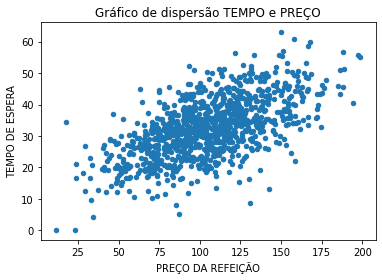

In [17]:
df.plot.scatter(x='PreçoRefeição',y='TempoEspera')
plt.title('Gráfico de dispersão TEMPO e PREÇO')
plt.ylabel('TEMPO DE ESPERA')
plt.xlabel('PREÇO DA REFEIÇÃO')

Agora vamos fazer um gráfico de dispersão separando os dados onde o atributo alvo é igual a 0 e um segundo gráfico onde o atributo alvo é igual a 1. vMas vamos sobrepor este dois gráfico em um mesmo 

[]

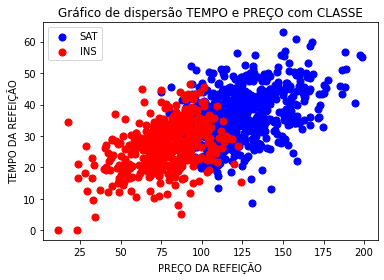

In [18]:
ax = df[df.Classe==1].plot.scatter(x='PreçoRefeição', y='TempoEspera', s = 50, color='blue', label='SAT');
df[df.Classe==0].plot.scatter(x='PreçoRefeição', y='TempoEspera', s = 50,color='red', label='INS', ax=ax);
plt.title('Gráfico de dispersão TEMPO e PREÇO com CLASSE')
plt.ylabel('TEMPO DA REFEIÇÃO')
plt.xlabel('PREÇO DA REFEIÇÃO')
plt.plot()

## Usando o Seaborn

Além do Matplotlib uma outra biblioteca bastante poderosa é o seaborn, com ele alguns gráfcios ficam bem mais simples, vamos ver como seria um gráfico de dispersão com classe

Text(0.5, 1.0, 'Gráfico de Dispersão Preço x Tempo com Classes no Seaborn ')

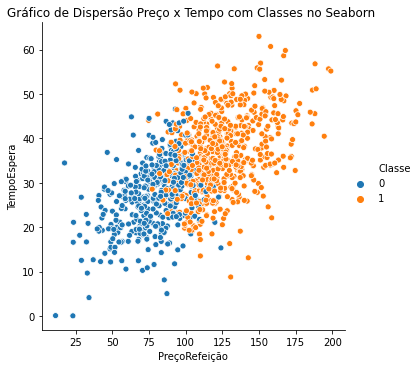

In [19]:
sns.relplot(x='PreçoRefeição', y='TempoEspera', hue="Classe", data=df);
plt.title('Gráfico de Dispersão Preço x Tempo com Classes no Seaborn ')

Outro recurso útil do seaborn é o Boxplot ou diagramd e caixa que mostra a distribuiçõa do dadso de uma varíavel com le podemos ver as difrenças nas distribuição, maxmo mínimo média e os quartis separado por classes. Na nossa amostra da para perceber que os dados da Classe 0 e 1 possuem distribuições diferentes

Text(0.5, 1.0, 'Gráfico Boxplot Tempo de Espera com Classes no Seaborn ')

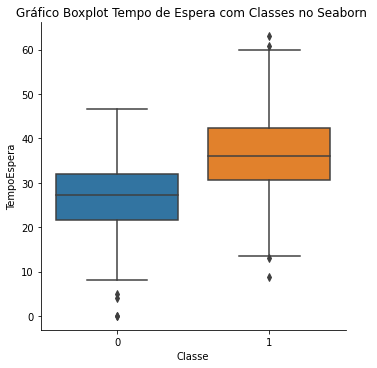

In [20]:
sns.catplot(x="Classe", y="TempoEspera", kind="box", data=df);
plt.title('Gráfico Boxplot Tempo de Espera com Classes no Seaborn ')

Text(0.5, 1.0, 'Gráfico Boxplot Preço Refeição com Classes no Seaborn ')

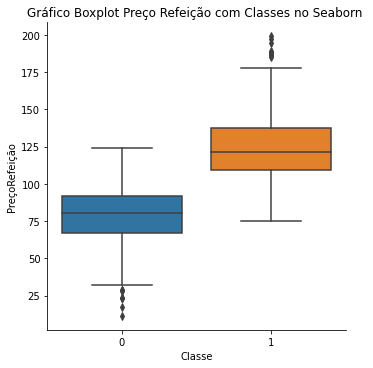

In [21]:
sns.catplot(x="Classe", y="PreçoRefeição", kind="box", data=df);
plt.title('Gráfico Boxplot Preço Refeição com Classes no Seaborn ')

## Separação da Amostra

Como já vimos temos para realizar um experimento com Aprendizado de Máquina,temos de separar os atributos em X que são os atributos que vamos usar na predição, neste caso Tempo e Preço, e y que é o atributo alvo de separar a amostra em dados de treinamento e dados de teste. Para isso usamos a função train_test_split informando o percentual dos dados para treinamento neste caso 0.4 que é 40%
![Modelo geral de Preparação dos dados no Scikit Learn](https://miro.medium.com/max/1400/1*rBx2D83rNUloJsq5gC_QIw.png)

In [0]:
## Criação das matrizes X e y
X = df[['PreçoRefeição','TempoEspera']].values
y = df['Classe'].values

In [0]:
## Separação de X e y em conjuntos d etreinamento e testo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=10)

## Criando o Classificador - Arvores de Decisão

Uma árvore de decisão é como ir a um médico que faz uma série de perguntas para determinar a causa dos seus sintomas. Podemos usar um processo para criar uma árvore de decisão e ter uma série de perguntas para
prever uma classe de destino. As vantagens desse modelo incluem suporte para dados não numéricos (em algumas implementações), pouca preparação de dados (sem necessidade de dimensionamento), suporte para lidar com relacionamentos não lineares, revelações de importância de recursos e é fácil de explicar.
O algoritmo padrão usado para criação é chamado de árvore de classificação e regressão (CART). Ele usa a impureza de Gini ou a medida do índice para construir decisões. Isso é feito repetindo os recursos e encontrando o valor que oferece a menor probabilidade de classificação incorreta.

Vamos criar uma árvore e para controlar seu tamanho vamos usar a produndidade máxima max_depth= 3

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=3)

### Treinamento da árvore
Agora vamos treinar a árvore usando a função fit(X_train, y_train)

In [25]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Pronto agora temos um modelo que rediz os resultados de y em função de X, ou seja sabendo o Preço e o Tempo é possível estimar se o cliente saiu satisfeito ou não.
Vamos armazenar o resultado da predição com os dados de X_test que é feita com o método predict(X_test) na varáivel y_pred. Como sabemso que os valores reais para X_test estão no conjunto y_test podemos compara y_test e y_pred e saber como nosso modelo está se saindo na predição

In [0]:
y_pred = clf.predict(X_test)

O Métod score permite que calculemos o precentual de predições certas diretamente basta aplicá-lo a clf usando X_test e y_tes como parâmetros, veja o exemplo:

In [27]:
clf.score(X_test, y_test)

0.86

Nada mal nossa árvore obteve um score de 0.86 isso quer dizer que acertou 86% das predições. Vamos agora usar a matriz de confusão para verificar nossa txa de acertos d ede erros entre os valores positivos e negativos

In [28]:
confusion_matrix(y_test,y_pred)

array([[133,  31],
       [ 25, 211]])

Essa ultima visualização não é muito amigável, mas a função plot_confusion_matrix apresneta uma matriz de confusão muito mais interessante. São usados como parãmetros clf que o modelo, X_test, y_test cmap que é o mapa de cores de sua preferência e display_labels como os nomes das classes para 0 e 1. O parâmetro normalie ='true' coloca os valores em percentuais

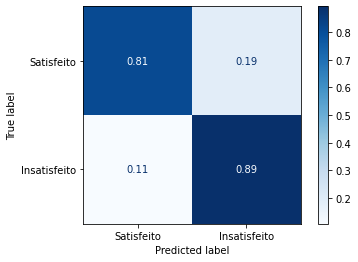

In [29]:
plot_confusion_matrix(clf, X_test,y_test, cmap=plt.cm.Blues,normalize='true', display_labels=['Satisfeito','Insatisfeito'])

Essa matriz nos mostra o seguinte (De cima para baixo e da esquera para direita):
- No primeiro quadrante (primeira linha superior e primeira coluna) temos os valores reais de clientes satisfeitos e que foram corretamente preditos como satisfeitos que foram 0.81 ou 81% dos exemplos do conjunto y_test **São verdadeiros Positivos**
- No segundo quadrante (primeira linha superior e segunda coluna) temos os valores reais de clientes satisfeitos e que foram incorretamente preditos como insatisfeitos que foram 0.19 ou 19% dos exemplos do conjunto y_test **São Falsos Positivos**
- No terceiro quadrante (segunda linha inperior e primeira coluna) temos os valores reais de clientes insatisfeitos e que foram incorretamente preditos como satisfeitos que foram 0.11 ou 11% dos exemplos do conjunto y_test **São Falsos Negativos**
- No quarto quadrante (segunda linha inperior e segunda coluna) temos os valores reais de clientes insatisfeitos e que foram corretamente preditos como insatisfeitos que foram 0.89 ou 89% dos exemplos do conjunto y_test **São verdadeiros negativos**

## Predição de Probabilidades
Outro recurso da modelagem é a predição de probabilidade de pertencer a uma classe. O Modelo pode dizer se um exemplo é mais provavel de ser o ou de ser 1 veja o gráfcio a seguir:

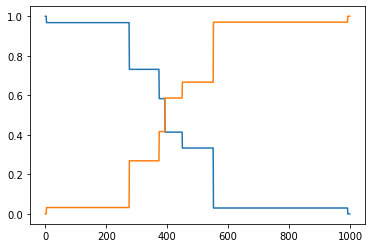

In [30]:
arr = clf.predict_proba(X)
P = arr[arr[:, 1].argsort()]
plt.plot(P[:,0])
plt.plot(P[:,1])

## Visualização da árvore de decisão

Um recurso bastante ultil para entender com funciona á arvore é a função plot_tree os parâmetros dessa função são o modelo em nosso caso clf, o tamnaho da fonte, filled se desejamso colorir a árvore e o nome das classes
Usamos **plt.figure(figsize=(25,15))** para ajustar o tamanho da figura neste naso 25 na vertical e 15 na horizontal

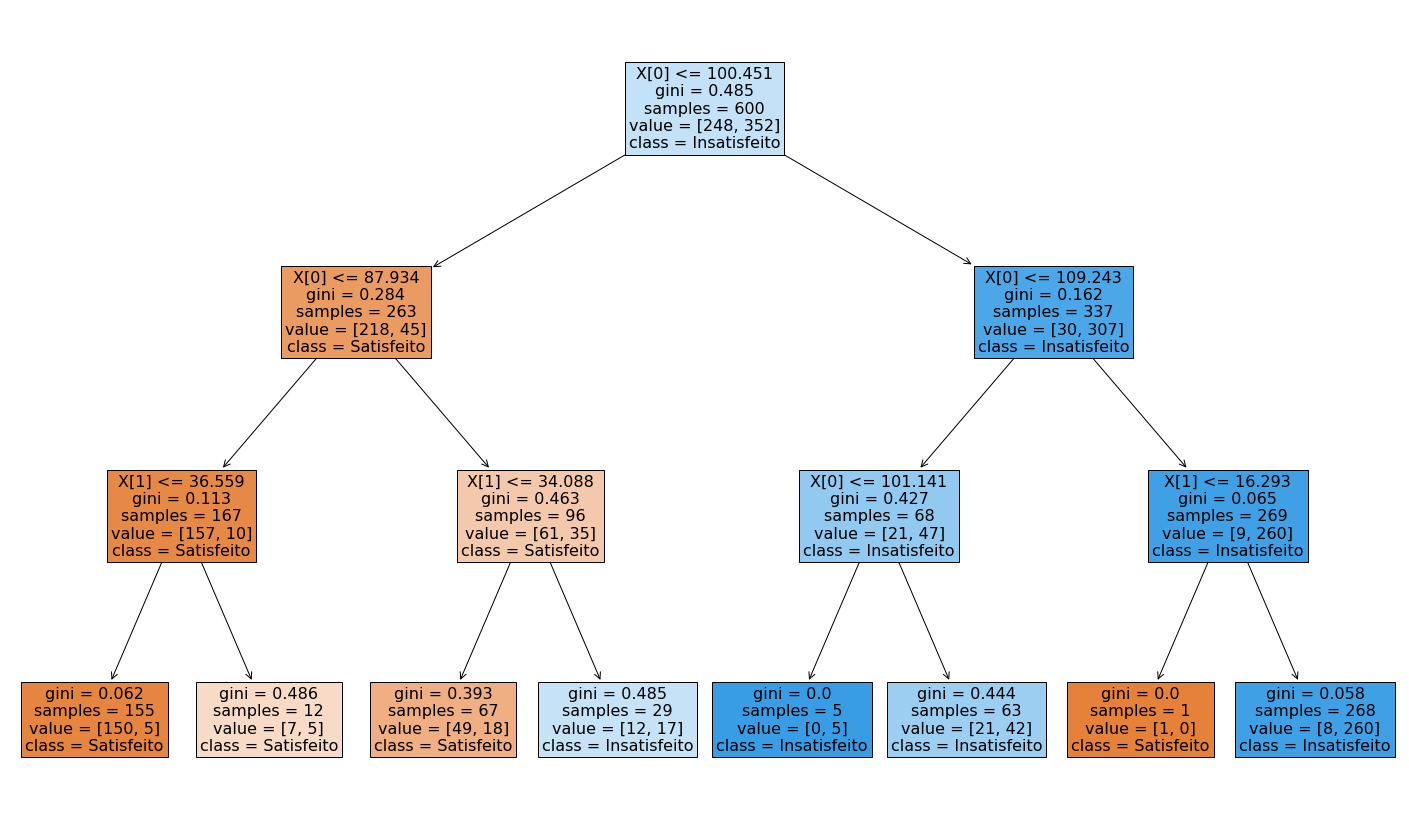

In [31]:
plt.figure(figsize=(25,15))
tree.plot_tree(clf, fontsize=16, filled=True, class_names=['Satisfeito','Insatisfeito']);

## Importância dos atributos

Como vimos na parte teórica numa árvore os atributos são priorizados tentando encontra a menoor entropia em determinadas partes dos dados. Qunato mais organizadas essas regiões em relação a um atributo maor será sua importancia.usando o método .feature_importances_ podemos fazer um gráfico para mostrar essa relação

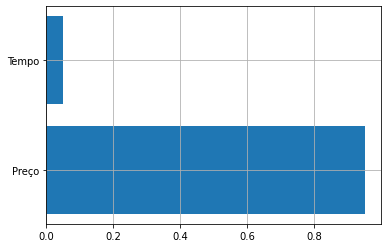

In [32]:
plt.barh(y = [0,1],width=clf.feature_importances_,tick_label=['Preço','Tempo'])
plt.grid()

## Colocando tudo junto na função grafico_classificador.
A functiom **grafico_classificador()** pode ser parametrizada para visualizar em conjunto:
- o dataset, 
- o dataset sobreposto a superficie de decisão do modelo,
- a matriz de confusão
- o gráfico das probailidades ordenadas
- a superfície de decisão do modelo
- a curva ROC  
Os parametros são:
- **X** A matriz de atributos de predição no nosso caso Preço e Tempo
- **y** O vetor do atributo alvo no nsso caso o atributo Classe
- **modelo** A criação do modelo de acordo com os prâmetros do sklearn, vamos criar modelos para os principais tipos de classificadores do sklearn, ams você pode consultar a documentação do sklearn para classificadores para ver como eles são parâmetrizados [neste link](https://scikit-learn.org/stable/supervised_learning.html)
- **test_size** que é a porcentagem do dataset que usaremos para teste
- **nome_modelo** Uma string para coocar o nome do modelo no título dos gráficos
- **nome_dataset** Uma string para coocar o nome do dataset no título dos gráficos
- **pca** Use True se a matriz X **tiver maos que duas colunas** e False se tiver menos
- **norm** Use True para **normalizar** os dados (na maioria dos modelos é necessário normalizar os dados)

In [0]:
def grafico_classificador(X, y, test_size, modelo, nome_modelo, nome_dataset, pca=False, norm=True):
    cmap = 'bwr'
    fig, ax = plt.subplots(2, 3, figsize=(15,10))
    suptitle = nome_modelo
    if pca==True:
        pca=PCA(n_components=2)
        pca.fit(X)
        X = pca.transform(X)
    if norm==True:
        X = StandardScaler().fit_transform(X)
        suptitle = nome_modelo+ ' Dados Normalizados'
    fig.suptitle(suptitle, fontsize=16)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    clf = modelo
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # Plotagem do dataset
    ax[0,0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap,edgecolors='w', s=10)
    ax[0,0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, alpha=0.6,edgecolors='w',s=10)
    ax[0,0].set_title(nome_dataset)
    ax[0,0].set_xlabel('X1')
    ax[0,0].set_ylabel('X2')
    ax[0,1].contourf(xx, yy, Z, cmap=cmap, alpha=.8)
    ax[0,1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap,edgecolors='w',s=10)
    ax[0,1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, alpha=0.6,edgecolors='w',s=10)
    ax[0,1].set_title(nome_modelo+' score='+str(score))
    ax[0,1].set_xlabel('X1')
    ax[0,1].set_ylabel('X2')
    y_pred = clf.fit(X_train,y_train).predict(X_test)
    arr = clf.predict_proba(X)
    P = arr[arr[:, 1].argsort()]
    fpr, tpr, tres = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    aucc = auc(fpr,tpr)
    ax[0,2].matshow(confusion_matrix(y_test,y_pred),cmap='bwr')
    ax[0,2].set_title('Matriz de Confusão')
    ax[0,2].text(0, 0, confusion_matrix(y_test,y_pred)[0,0],color='w', fontsize=16, horizontalalignment='center')
    ax[0,2].text(0, 1, confusion_matrix(y_test,y_pred)[0,1],color='w', fontsize=16, horizontalalignment='center')
    ax[0,2].text(1, 0, confusion_matrix(y_test,y_pred)[1,0],color='w', fontsize=16, horizontalalignment='center')
    ax[0,2].text(1, 1, confusion_matrix(y_test,y_pred)[1,1],color='w', fontsize=16, horizontalalignment='center')
    ax[0,2].set_xticklabels(['','prev positivo','prev negativo'])
    ax[0,2].set_yticklabels(['','real positivo','real negativo'], rotation=90, va="center")
    ax[1,0].plot(P[:,0],'b-')
    ax[1,0].plot(P[:,1],'r-')
    ax[1,0].set_title(nome_modelo+' Curvas Prob.')
    ax[1,0].set_ylabel('Prob')
    ax[1,1].contourf(xx, yy, Z, cmap=cmap, alpha=.8)
    ax[1,1].set_title(nome_modelo+' Superf. Dec.')
    ax[1,1].set_xlabel('X1')
    ax[1,1].set_ylabel('X2')
    ax[1,2].plot(fpr,tpr,'r-')
    ax[1,2].plot([0,1],[0,1],'b:')
    ax[1,2].set_title('Curva ROC AUC= '+str(np.round(aucc,3)))
    ax[1,2].set_xlabel('TFP')
    ax[1,2].set_ylabel('TVP')
    fig.tight_layout(pad=3.5)
    return

## Visualização do Classificador DecisionTreeClassifier

Vamos construir uma visualização para um modelo con os nosso dados X e y e profundidade máxima max_depth=5
Veja mais sobre os parâmetros deste modelo  [neste link](https://scikit-learn.org/stable/modules/tree.html#classification)

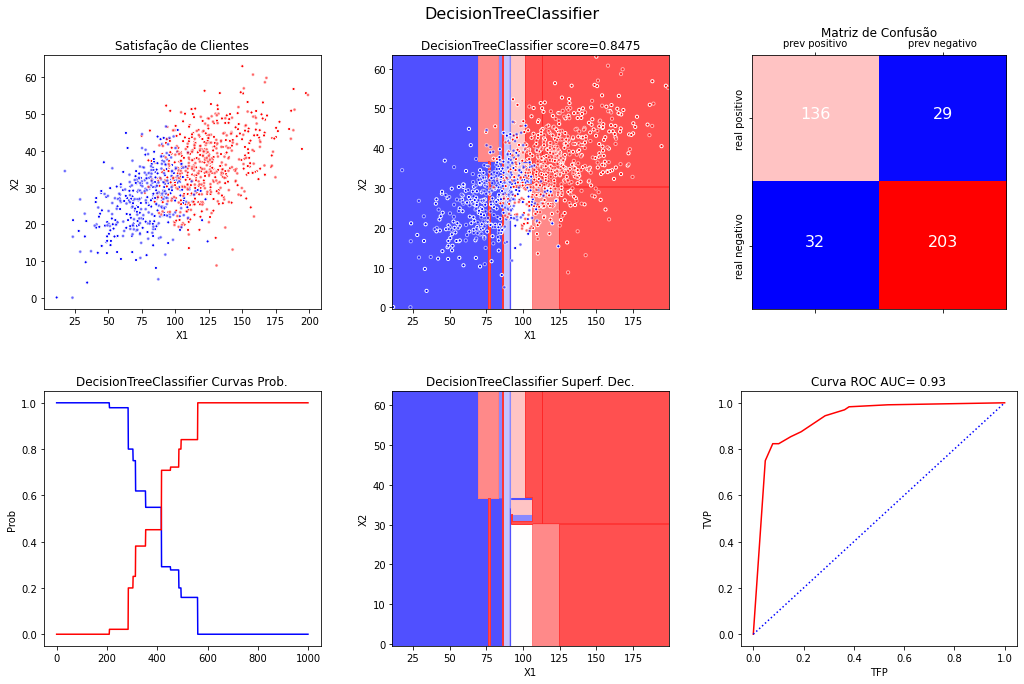

In [34]:
grafico_classificador(X, y, test_size=0.4, modelo=DecisionTreeClassifier(max_depth=5), 
                      nome_modelo='DecisionTreeClassifier', nome_dataset='Satisfação de Clientes', 
                      pca=False, norm=False)

Neste caso a métrica score foi de 0.8475 vamos mudar a mx_depth para 3 e ver o que acontece

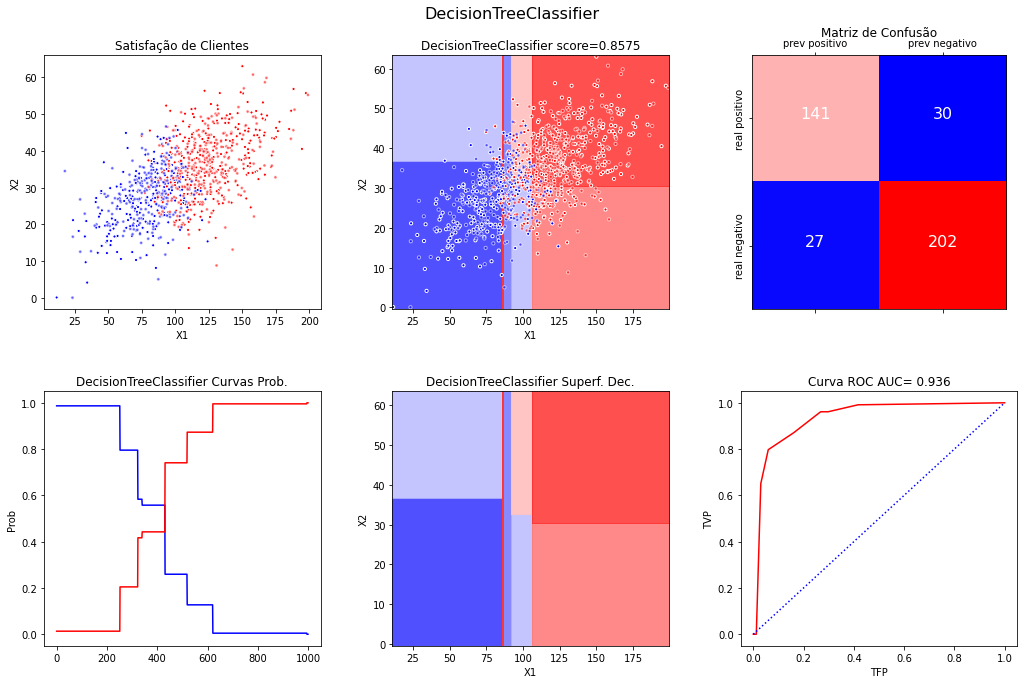

In [35]:
grafico_classificador(X, y, test_size=0.4, modelo=DecisionTreeClassifier(max_depth=3), 
                      nome_modelo='DecisionTreeClassifier', nome_dataset='Satisfação de Clientes', 
                      pca=False, norm=False)

A métrica score melhorou um pouco quase 86% (0.8575) e a matriz de confusão mostra que aumentaram os numeros de verdadeiros positivos. Vamso agora usas max_depth = 7

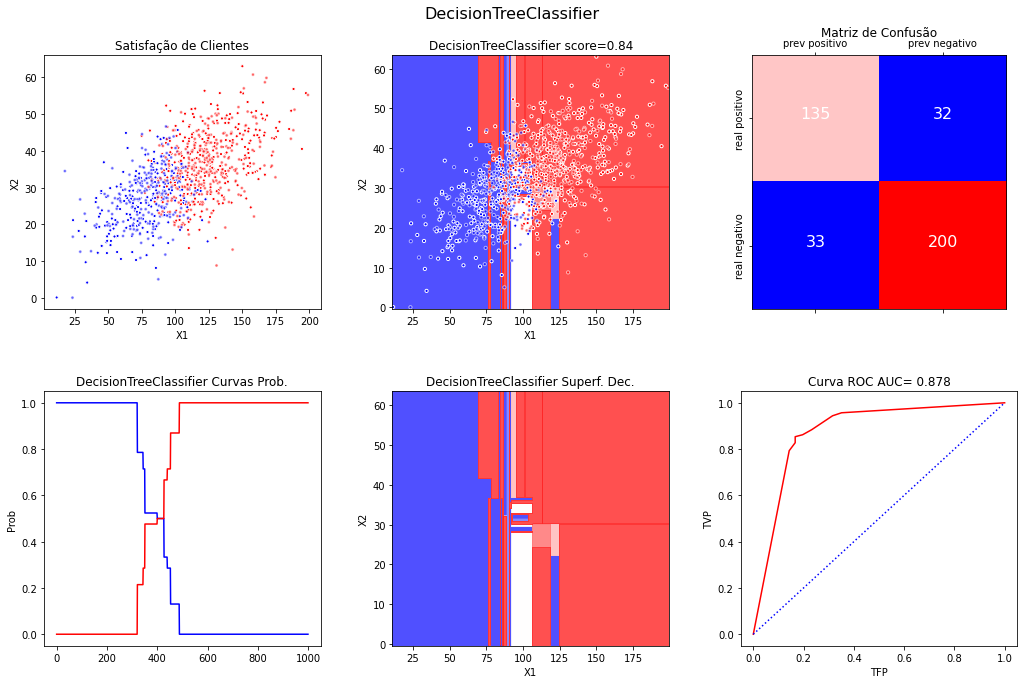

In [36]:
grafico_classificador(X, y, test_size=0.4, modelo=DecisionTreeClassifier(max_depth=7), 
                      nome_modelo='DecisionTreeClassifier', nome_dataset='Satisfação de Clientes', 
                      pca=False, norm=False)

## Visualização do Classificador SVM Linear (Máquina de Vetores de Suporte Linear)

Uma SVM (Support Vector Machine) é um algoritmo que tenta ajustar uma linha (ou plano ou hiperplano) entre as diferentes classes que maximiza a distância da linha aos pontos das classes. Dessa maneira, ele tenta encontrar uma separação robusta entre as classes. Os vetores de suporte são os pontos da aresta do hiperplano divisor.
A SVM Linear é parametrizada definindo o tipo do kernel e o fator de penalidade o parâmetro probability=True é obrigatório
Veja mais sobre os parâmetros deste modelo  [neste link](https://scikit-learn.org/stable/modules/svm.html#classification)

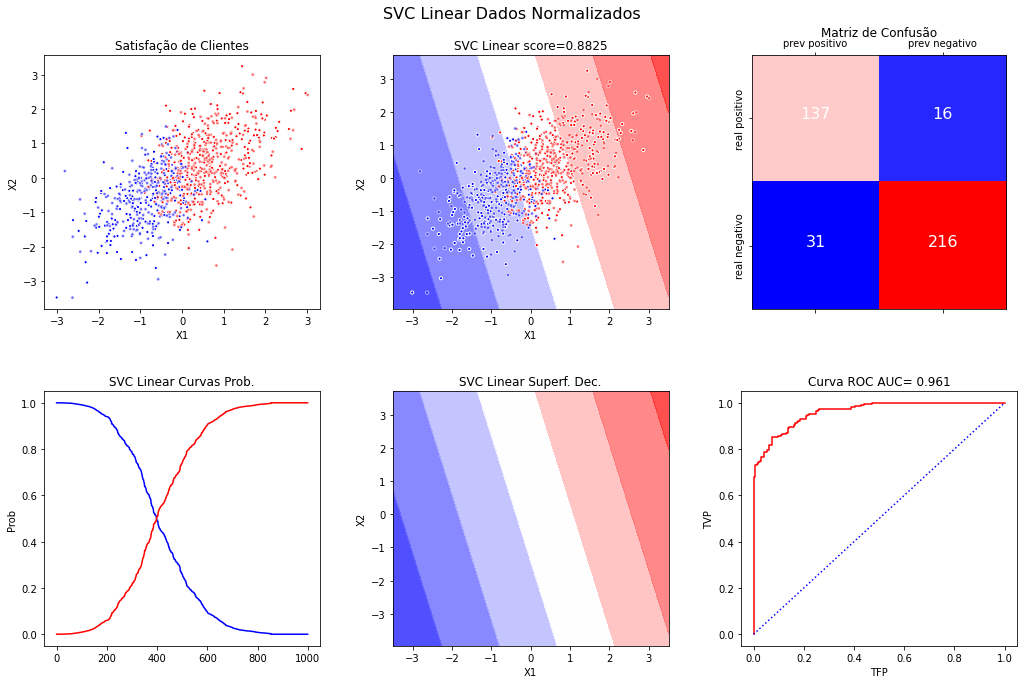

In [37]:
grafico_classificador(X, y, test_size=0.4, modelo=SVC(kernel="linear", C=0.025, probability=True), 
                      nome_modelo='SVC Linear', nome_dataset='Satisfação de Clientes', pca=False, norm=True)

A SVM mostrou u resultado superiro ao da Arvore com um sore 0.8825. Vamos mudar o fator C para 0.1 e ver o resultado

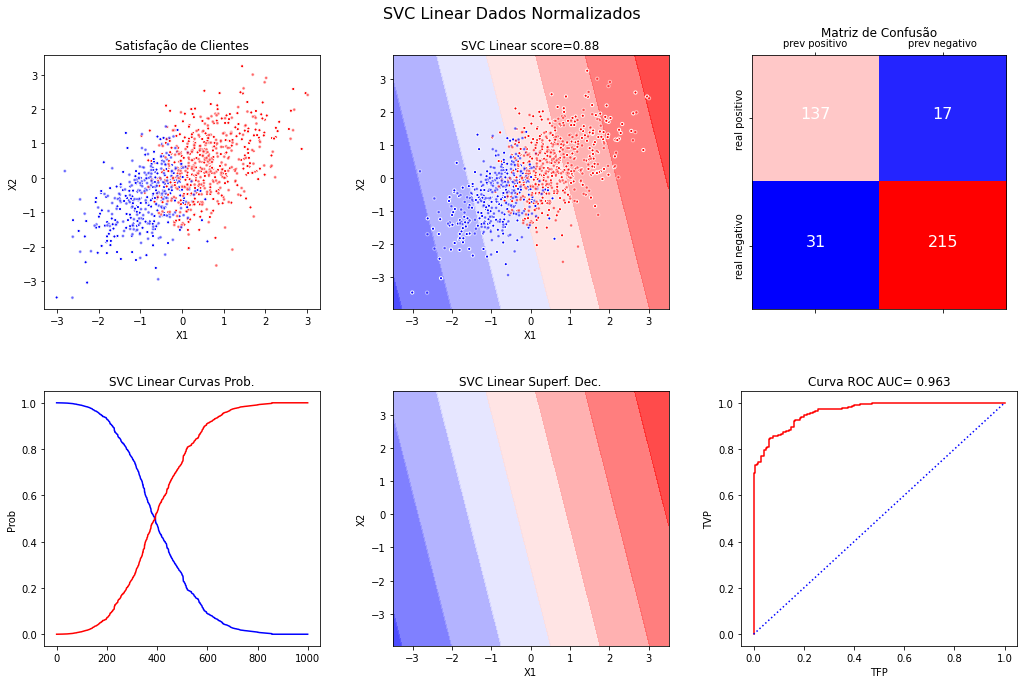

In [38]:
grafico_classificador(X, y, test_size=0.4, modelo=SVC(kernel="linear", C=0.1, probability=True), 
                      nome_modelo='SVC Linear', nome_dataset='Satisfação de Clientes', pca=False, norm=True)

## Visualização do Classificador SVM RBF (Máquina de Vetores de Suporte RBF)

A SVM RBF é parametrizada definindo o tipo do kernel e o fator de penalidade C e o fator gama da RBF o parâmetro probability=True é obrigatório
Veja mais sobre os parâmetros deste modelo  [neste link](https://scikit-learn.org/stable/modules/svm.html#classification)

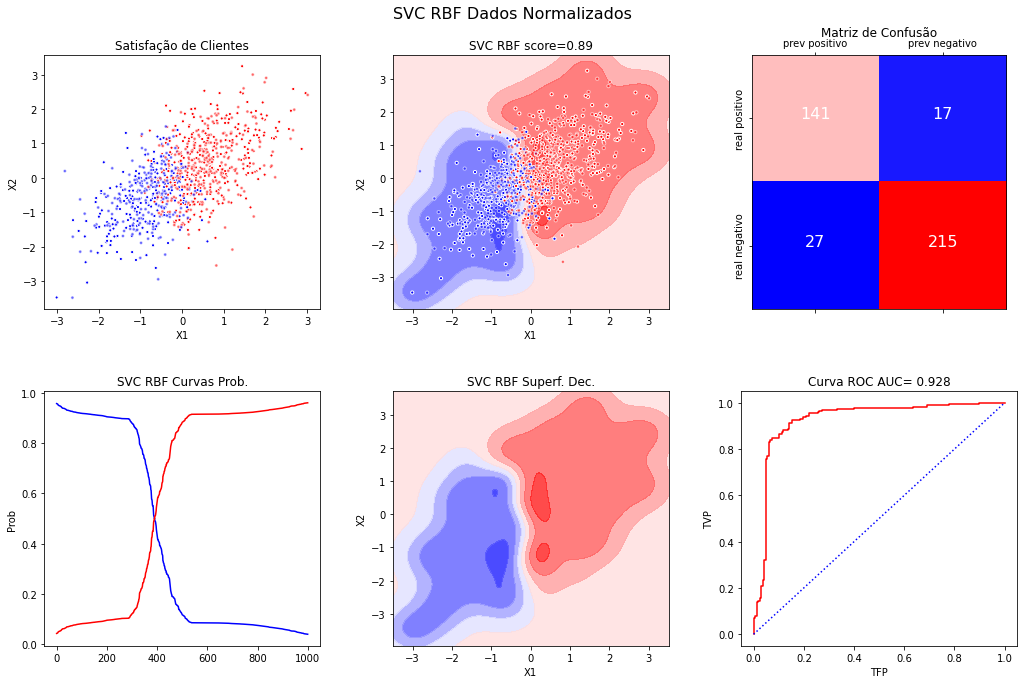

In [39]:
grafico_classificador(X, y, test_size=0.4, modelo=SVC(kernel="rbf",gamma=2.0, C=1.0, probability=True), 
                      nome_modelo='SVC RBF', nome_dataset='Satisfação de Clientes', pca=False, norm=True)

## Visualização do Classificador MLPClassifier (MultiLayerPerceptronClassifier)

O Perceptron de várias camadas (MLP) é um algoritmo de aprendizado supervisionado que aprende uma função treinando em um conjunto de dados, onde é com um dado número de dimensões de entrada e o número de dimensões para saída. Dado um conjunto de X e um y, ele pode aprender um aproximador de função não linear para classificação.  
![A Figura 1 mostra uma MLP sendo treinada](https://www.edureka.co/blog/wp-content/uploads/2017/12/Perceptron-Learning-Algorithm_03.gif)

A MLP é parametrizada definindo a txa de aprendizado alpha e o numero máximo de épocas (max_iter)
Veja mais sobre os parâmetros deste modelo  [neste link](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

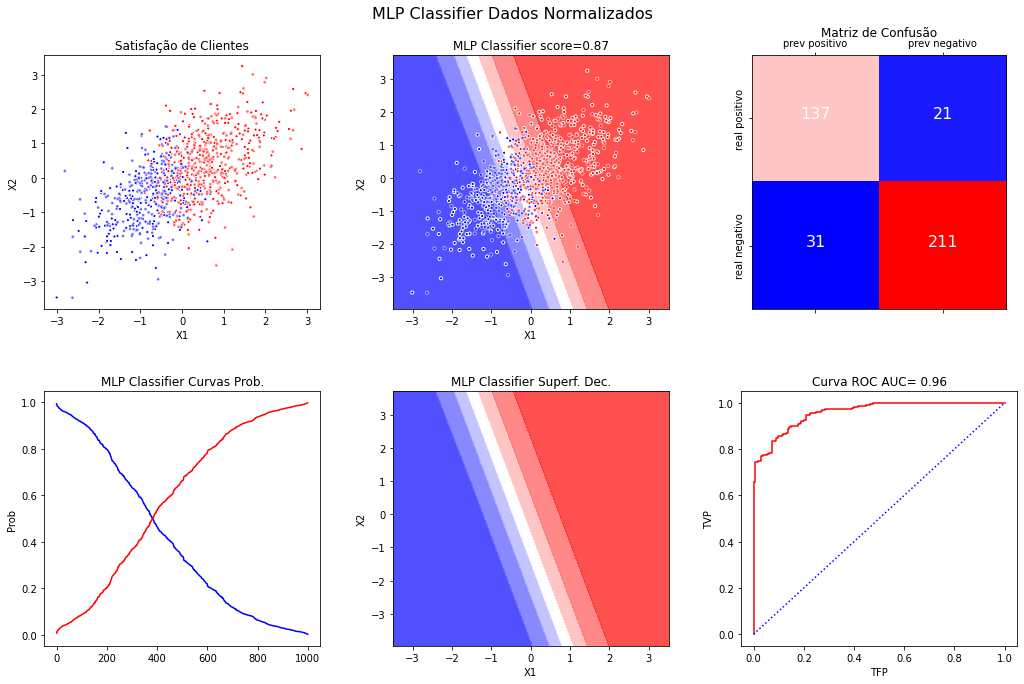

In [40]:
grafico_classificador(X, y, test_size=0.4, modelo=MLPClassifier(alpha=10, max_iter=1000), 
                      nome_modelo='MLP Classifier', nome_dataset='Satisfação de Clientes', pca=False, norm=True)

## Visualização do Classificador Naive Bayes (GaussianNB)

Os algoritmos naive Bayes (métodos ingênuos de Bayes) são um conjunto de algoritmos de aprendizado supervisionado baseados na aplicação do teorema de Bayes com a suposição "ingênua" de independência condicional entre cada par de recursos, dado o valor da variável de classe  
![Mostra as superficies de um classificador naive bayes em 3D](http://www.semspirit.com//wp-content/uploads/sites/17154/2017/11/PY-NB-HOSTEL-VS-RETAIL-TEST-SET-3D-model-capture-800x450-compress35.gif)



Existem diferentes tipos de classificadores Naive Bayes vamos usar o GaussianNB que é o mais simples delesnão são necessários parâmetros de entrada
Veja mais sobre os parâmetros deste modelo  [neste link](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

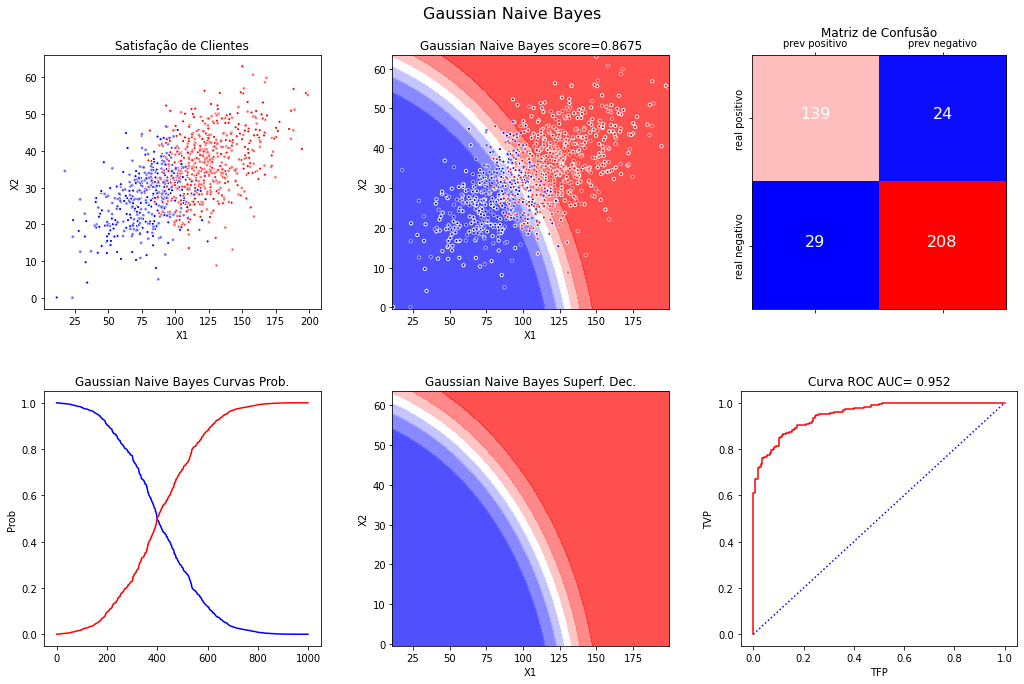

In [41]:
grafico_classificador(X, y, test_size=0.4, modelo= GaussianNB(), 
                      nome_modelo='Gaussian Naive Bayes', nome_dataset='Satisfação de Clientes', pca=False, norm=False)

## Visualização K Nearest Neighboors (KNN)

A idéia por trás do kNN é que pontos de dados semelhantes devem ter a mesma classe, pelo menos na maioria das vezes. Esse método é muito intuitivo e já se comprovou em muitos domínios, incluindo sistemas de recomendação, detecção de anomalias e classificação de imagem / texto.

Por exemplo, considere um caso em que você deseja classificar uma imagem como um dos 2.000 tipos possíveis, como "pessoa", "animal", "ao ar livre", "oceano", "pôr do sol" e assim por diante. Dada uma função de distância adequada entre as imagens, a classificação de uma imagem não rotulada pode ser determinada pelos rótulos atribuídos aos vizinhos mais próximos, ou seja, as imagens rotuladas mais próximas a ela, de acordo com a função de distância.

Outro uso do kNN, embora menos comum, é para problemas de regressão. Aqui, o objetivo não é determinar a classe de uma consulta, mas prever um número contínuo (por exemplo, o salário de uma pessoa, o custo de uma experiência, etc.). A previsão de uma consulta é definida como uma função dos rótulos de seus vizinhos. Normalmente, é definido como a média e, às vezes, como a mediana ou média geométrica.

![Mostra as superficies de um KNN](https://miro.medium.com/max/768/1*NdGSyOK0O4ir5dQ99V3Jvg.gif)



Para parametrizar o KNN o principal é definir n_neighbors neste caso vamos usar 5
Veja mais sobre os parâmetros deste modelo  [neste link](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

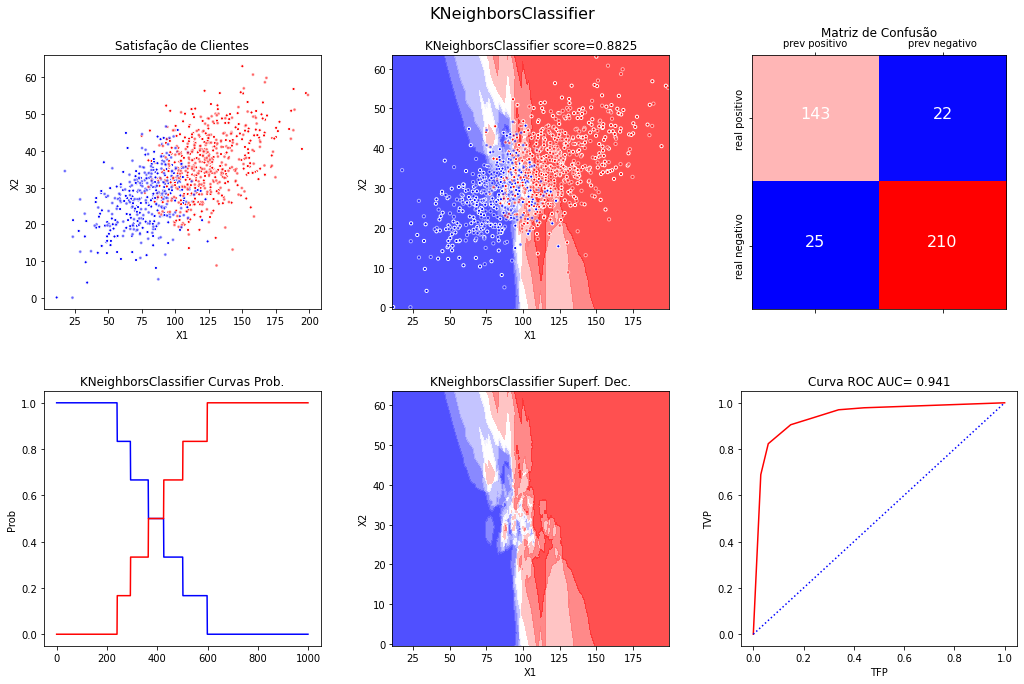

In [42]:
grafico_classificador(X, y, test_size=0.4, modelo= KNeighborsClassifier(n_neighbors=6), 
                      nome_modelo='KNeighborsClassifier', nome_dataset='Satisfação de Clientes', pca=False, norm=False)

## Visualização da Analise Discriminante Quadrática (QDA)

A Análise Discriminante Linear (LinearDiscriminantAnalysis) e a Análise Quadrática Discriminante (QuadraticDiscriminantAnalysis) são dois classificadores clássicos, com, como seus nomes sugerem, uma superfície de decisão linear e quadrática, respectivamente.

Esses classificadores são atraentes porque possuem soluções em formato fechado que podem ser facilmente computadas, são inerentemente multiclasses, comprovadamente funcionam bem na prática e não possuem hiperparâmetros para ajustar.  
![Mostra as superficies de um QDA](https://paulvanderlaken.files.wordpress.com/2020/01/qda.gif?w=600&zoom=1)



A QDA é bastante simples simples deles não são necessários parâmetros de entrada
Veja mais sobre os parâmetros deste modelo  [neste link](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)

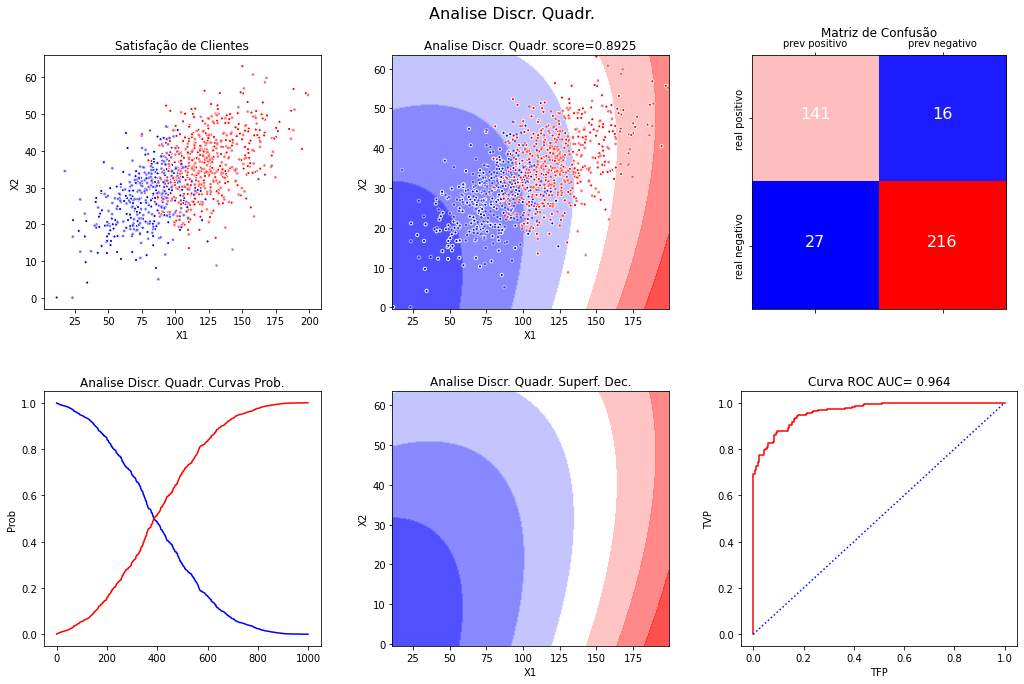

In [43]:
grafico_classificador(X, y, test_size=0.4, modelo= QuadraticDiscriminantAnalysis(), 
                      nome_modelo='Analise Discr. Quadr.', nome_dataset='Satisfação de Clientes', pca=False, norm=False)

## Visualização da Random Forrest (RandomForestClassifier)

As Random Forest (florestas aleatórias) onsistem num ensemble de muitas árvores de decisão, cada árvore do conjunto é criada a partir de uma amostra desenhada com substituição (bootstraping) do conjunto de treinamento.  
Além disso, ao dividir cada nó durante a construção de uma árvore, a melhor divisão é encontrada em todos os atributos de entrada ou em um subconjunto aleatório do tamanho max_features.  
O objetivo dessas duas fontes de aleatoriedade é diminuir a variação do Ramdom Forrest. 
De fato, as árvores de decisão individuais geralmente apresentam alta variação e tendem a se superestimar. 
A aleatoriedade injetada nas florestas produz árvores de decisão com erros de previsão um pouco dissociados. Ao fazer uma média dessas previsões, alguns erros podem ser cancelados. As florestas aleatórias alcançam uma variação reduzida combinando diversas árvores, às vezes ao custo de um ligeiro aumento no viés. Na prática, a redução de variância geralmente é significativa, resultando em um modelo melhor em geral.  
![Mostra as funções de decisão de uma ramdom Forrest](https://miro.medium.com/max/900/1*EFBVZvHEIoMdYHjvAZg8Zg.gif)

Para parametrizar uma ramdom forrest nós parametrimaos o nuemro de estimadores (n_estimators) e a profundidade máxima (max_depth)
Veja mais sobre os parâmetros deste modelo  [neste link](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)

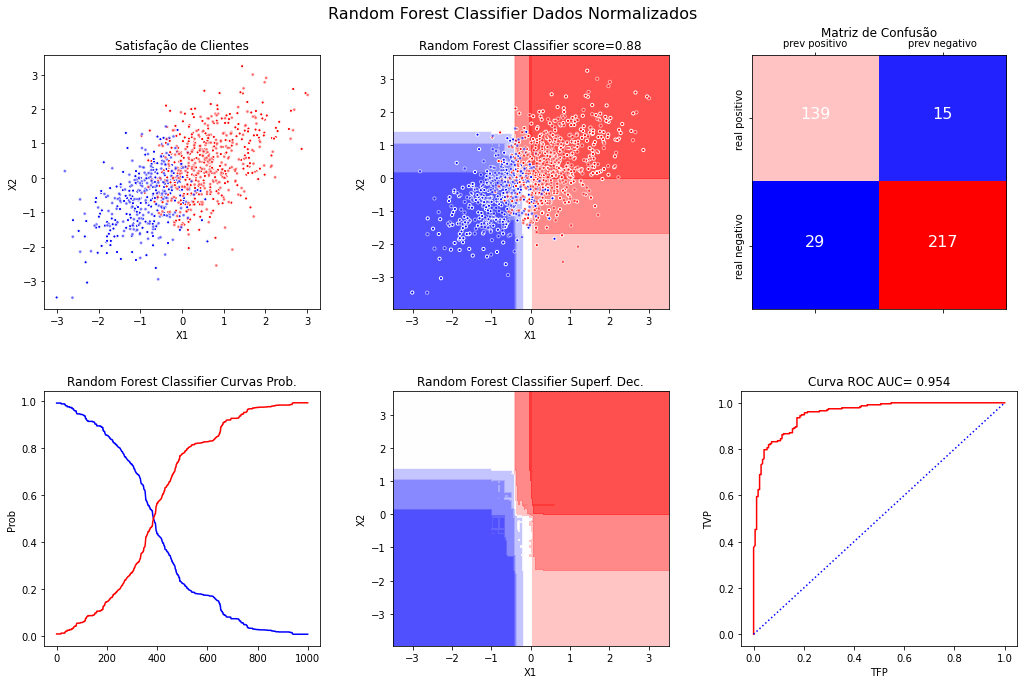

In [44]:
grafico_classificador(X, y, test_size=0.4, modelo=RandomForestClassifier(n_estimators=50, max_depth=3), 
                      nome_modelo='Random Forest Classifier', nome_dataset='Satisfação de Clientes', 
                      pca=False, norm=True)

## Visualização da AdaBoost (AdaBoostClassifier)

O princípio central do AdaBoost é ajustar uma sequência de alunos fracos (ou seja, modelos que são apenas um pouco melhores do que suposições aleatórias, como pequenas árvores de decisão) em versões modificadas repetidamente dos dados. As previsões de todos eles são então combinadas por meio de uma votação majoritária ponderada (ou soma) para produzir a previsão final. As modificações de dados em cada chamada iteração de reforço consistem na aplicação de pesos a cada uma das amostras de treinamento.   
Inicialmente, esses pesos estão todos definidos, de modo que o primeiro passo simplesmente treina um aluno fraco nos dados originais. Para cada iteração sucessiva, os pesos da amostra são modificados individualmente e o algoritmo de aprendizado é reaplicado aos dados ponderados novamente.   
Em uma determinada etapa, os exemplos de treinamento que foram incorretamente previstos pelo modelo impulsionado induzido na etapa anterior aumentaram seus pesos, enquanto os pesos foram reduzidos para aqueles que foram previstos corretamente. À medida que as iterações prosseguem, exemplos difíceis de prever recebem influência cada vez maior. Cada aluno fraco subsequente é forçado a se concentrar nos exemplos que são perdidos pelos anteriores na sequência.  

![Mostra as funções de decisão do AdaBoost](https://2.bp.blogspot.com/-7jSO3v-nSv4/VfjDTQL7XzI/AAAAAAAABcg/pPMZHTFtWo8/s1600/AdaBoost_animation.gif)

Para parametrizar um modelo adaboost nós parametrimaos o nuemro de estimadores (n_estimators)
Veja mais sobre os parâmetros deste modelo  [neste link](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)

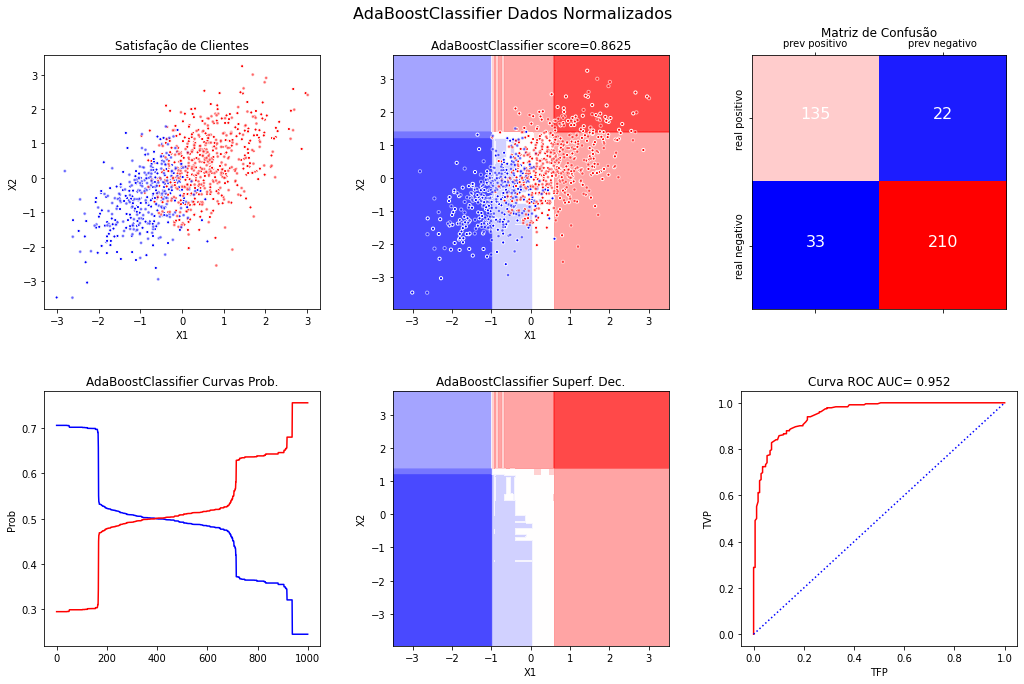

In [45]:
grafico_classificador(X, y, test_size=0.4, modelo=AdaBoostClassifier(n_estimators=50), 
                      nome_modelo='AdaBoostClassifier', nome_dataset='Satisfação de Clientes', 
                      pca=False, norm=True)

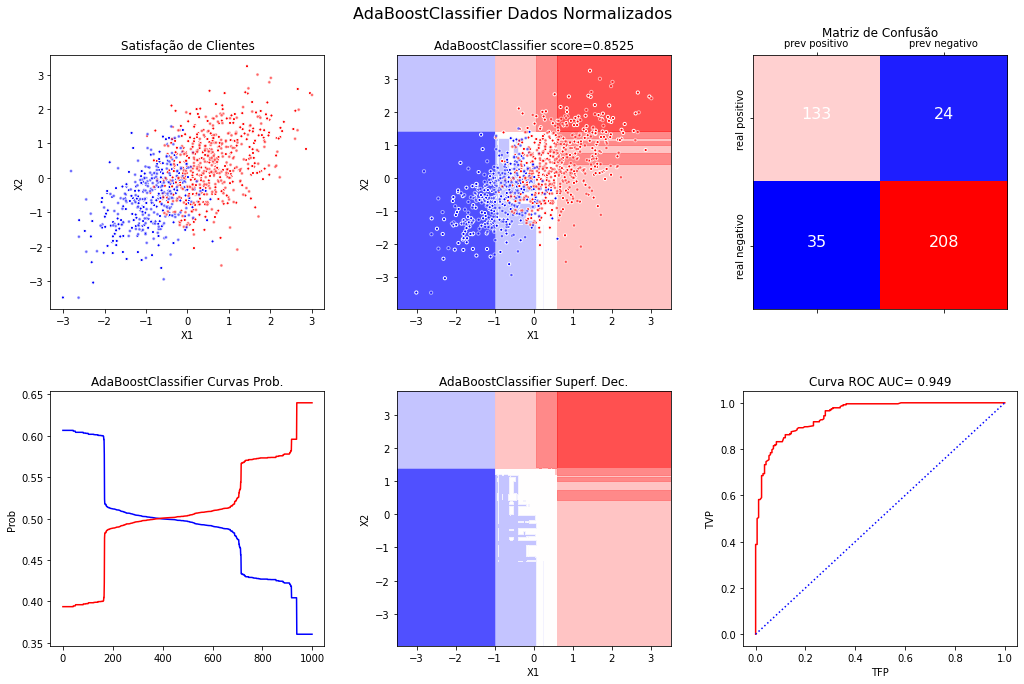

In [46]:
grafico_classificador(X, y, test_size=0.4, modelo=AdaBoostClassifier(n_estimators=100), 
                      nome_modelo='AdaBoostClassifier', nome_dataset='Satisfação de Clientes', 
                      pca=False, norm=True)

## Visualização da Gradiente Boosting (GradientBoostingClassifier)

Vamos começar entendendo o Boosting (impulsionamento) é um método de converter modelos fracos em modelos fortes. Ao impulsionar, cada nova árvore se encaixa em uma versão modificada do conjunto de dados original.  
O algoritmo de aumento de gradiente (gbm) pode ser mais facilmente explicado pela introdução do algoritmo AdaBoost. O algoritmo AdaBoost começa treinando uma árvore de decisão na qual cada observação recebe um peso igual.   
Depois de avaliar a primeira árvore, aumentamos os pesos das observações difíceis de classificar e diminuímos os pesos para as fáceis de classificar.   
A segunda árvore é, portanto, cultivada nesses dados ponderados. Aqui, a idéia é melhorar as previsões da primeira árvore. Nosso novo modelo é, portanto, Árvore 1 + Árvore 2.   
Em seguida, calculamos o erro de classificação desse novo modelo de conjunto de 2 árvores e cultivamos uma terceira árvore para prever os resíduos revisados. Repetimos esse processo para um número especificado de iterações.   
As árvores subsequentes nos ajudam a classificar observações que não são bem classificadas pelas árvores anteriores. As previsões do modelo de conjunto final são, portanto, a soma ponderada das previsões feitas pelos modelos de árvore anteriores.

![Mostra as funções de decisão do Gradiente Boosting](https://www.tensorflow.org/images/boosted_trees/boosted_trees_ntrees.gif)

Para parametrizar um modelo adaboost nós parametrimaos o nuemro de estimadores (n_estimators)
Veja mais sobre os parâmetros deste modelo  [neste link](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)

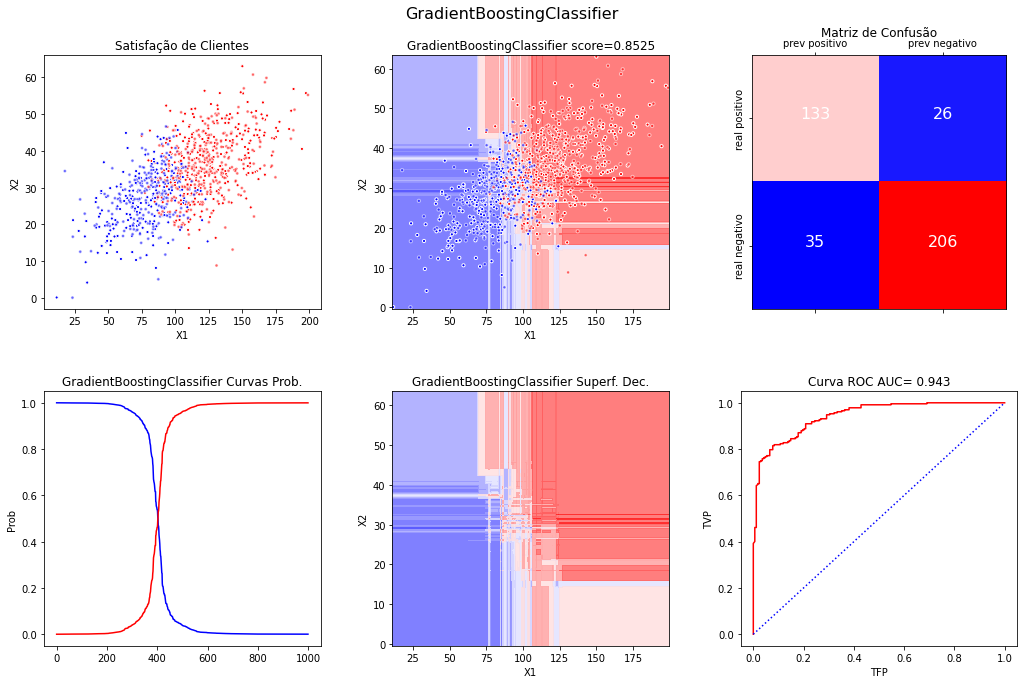

In [47]:
grafico_classificador(X, y, test_size=0.4, modelo=GradientBoostingClassifier(n_estimators=150, max_depth=5), 
                      nome_modelo='GradientBoostingClassifier', nome_dataset='Satisfação de Clientes', 
                      pca=False, norm=False)

In [48]:
# Vamos instalar outras bibliotecas pelo Juoyter
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install catboost


     |████████████████████████████████| 64.7MB 60kB/s 


In [0]:
from xgboost import XGBClassifier

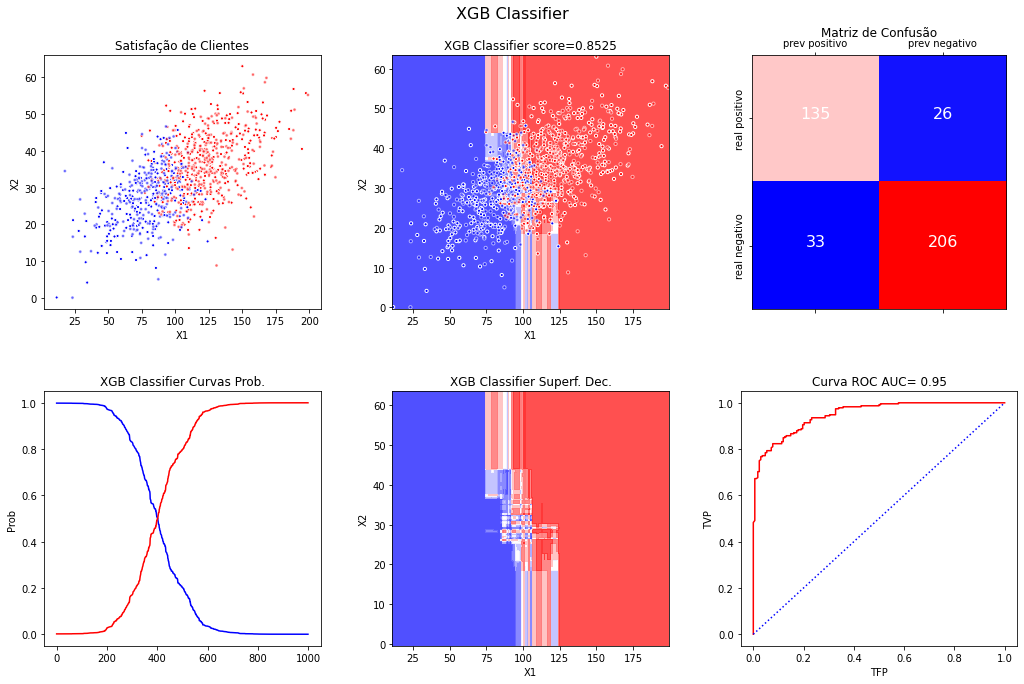

In [50]:
grafico_classificador(X, y, test_size=0.4, modelo=XGBClassifier(n_estimators=100, max_depth=5, random_state=42), 
                      nome_modelo='XGB Classifier', nome_dataset='Satisfação de Clientes', 
                      pca=False, norm=False)

In [0]:
from catboost import CatBoostClassifier

0:	learn: 0.4738386	total: 48.2ms	remaining: 48.2ms
1:	learn: 0.3854703	total: 48.9ms	remaining: 0us
0:	learn: 0.4738386	total: 649us	remaining: 649us
1:	learn: 0.3854703	total: 1.39ms	remaining: 0us


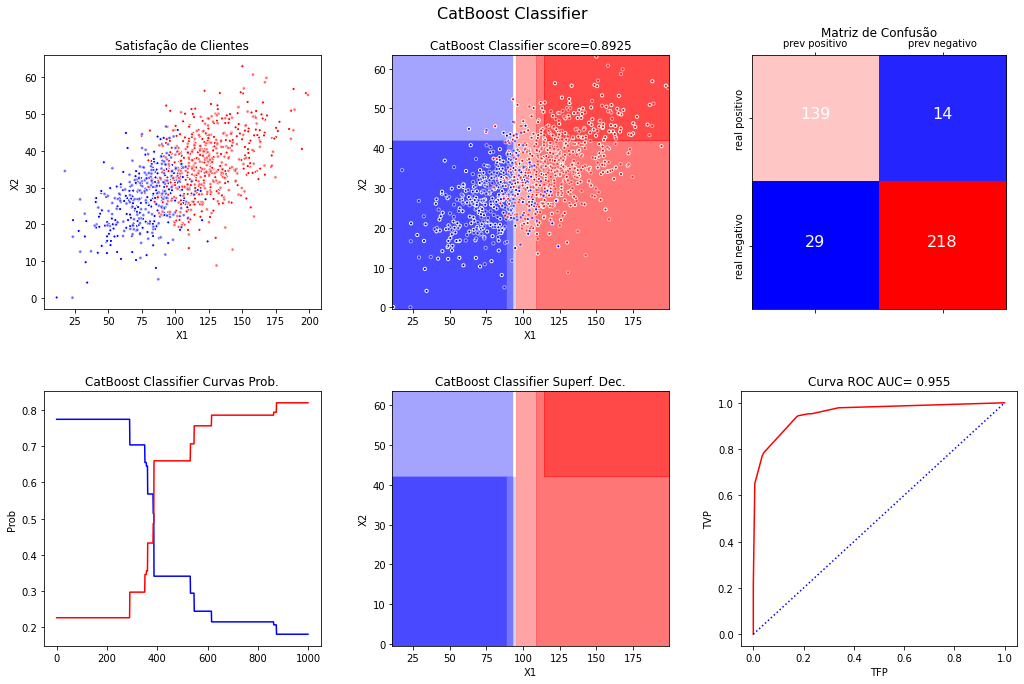

In [52]:
grafico_classificador(X, y, test_size=0.4, modelo=CatBoostClassifier(iterations=2,
                                                                     depth=3,learning_rate=0.5,loss_function='Logloss'), 
                      nome_modelo='CatBoost Classifier', nome_dataset='Satisfação de Clientes', 
                      pca=False, norm=False)